In [2]:
import pandas as pd

In [3]:
ai_papers = pd.read_csv('./datasets/ai_papers.csv')
dl_papers = pd.read_csv('./datasets/dl_papers.csv')
cv_papers = pd.read_csv('./datasets/cv_papers.csv')


In [4]:
ai_papers = ai_papers.iloc[:50, :]
dl_papers = dl_papers.iloc[:50, :]
cv_papers = cv_papers.iloc[:50, :]

In [5]:
# Adicionando coluna 'label'

ai_papers['label'] = "Artificial Intelligence"
dl_papers['label'] = "Digital Libraries"
cv_papers['label'] = "Computer Vision"


In [6]:
# Concatenando os datasets e exportando

papers = pd.concat([ai_papers, dl_papers, cv_papers])
if 'Unnamed: 0' in papers.columns:
    papers.drop(['Unnamed: 0'], axis=1, inplace=True)

## Primeira análise: distilBert + abstracts

In [7]:
# Alterando colunas para "text" e "label"

abstracts = papers[['abstract', 'label']]
abstracts = abstracts.rename({'abstract':'text'}, axis=1)

In [8]:
# # !pip install spacy
# import spacy

# nlp = spacy.load('en_core_web_sm')

# def remove_stopwords_spacy(text):
#     doc = nlp(text)
#     tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
#     return ' '.join(tokens)

# abstracts['text'] = abstracts['text'].apply(remove_stopwords_spacy)

# print(abstracts['text'])


In [9]:
# Pipeline para acelerar transformação para Dataset do HuggingFace

def hf_pipeline(data):
    from datasets import Dataset, ClassLabel

    unique_classes = data['label'].unique()

    dataframe = Dataset.from_pandas(data)
    class_label = ClassLabel(names=list(unique_classes))

    dataframe = dataframe.cast_column('label', class_label)

    return dataframe

In [10]:
abstracts = hf_pipeline(abstracts)

/home/lipecorradini/.cache/pypoetry/virtualenvs/llm-mri-RE74i_Ji-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Casting the dataset: 100%|██████████| 150/150 [00:00<00:00, 34224.32 examples/s]


In [11]:
# Definindo o distilBert como primeiro modelo a ser usado

model_ckpt = 'distilbert-base-uncased'

In [12]:
# Inicializando a biblioteca

from llm_mri import ActivationAreas
from llm_mri.dimensionality_reduction import PCA

pca = PCA(n_components=40)

llm_mri = ActivationAreas(model=model_ckpt, device="cpu", dataset=abstracts, reduction_method=pca)

### Obtendo métricas para o distilbert-base-uncased

In [13]:
# Processando as áreas de ativação

llm_mri.process_activation_areas()


Map: 100%|██████████| 150/150 [00:46<00:00,  3.22 examples/s]


[0, 1]


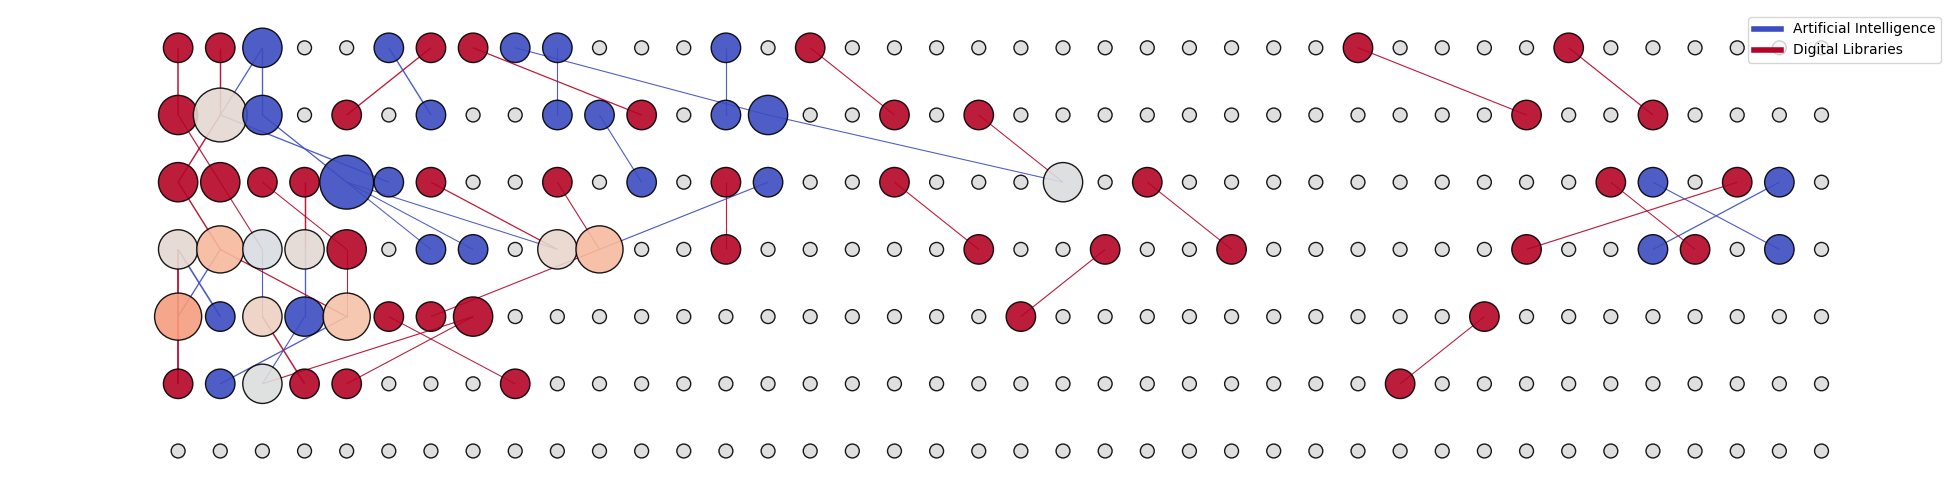

In [14]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Artificial Intelligence', 'Digital Libraries'], threshold=0.5)
_ = llm_mri.get_graph_image(g)
plt.show()

[0, 2]


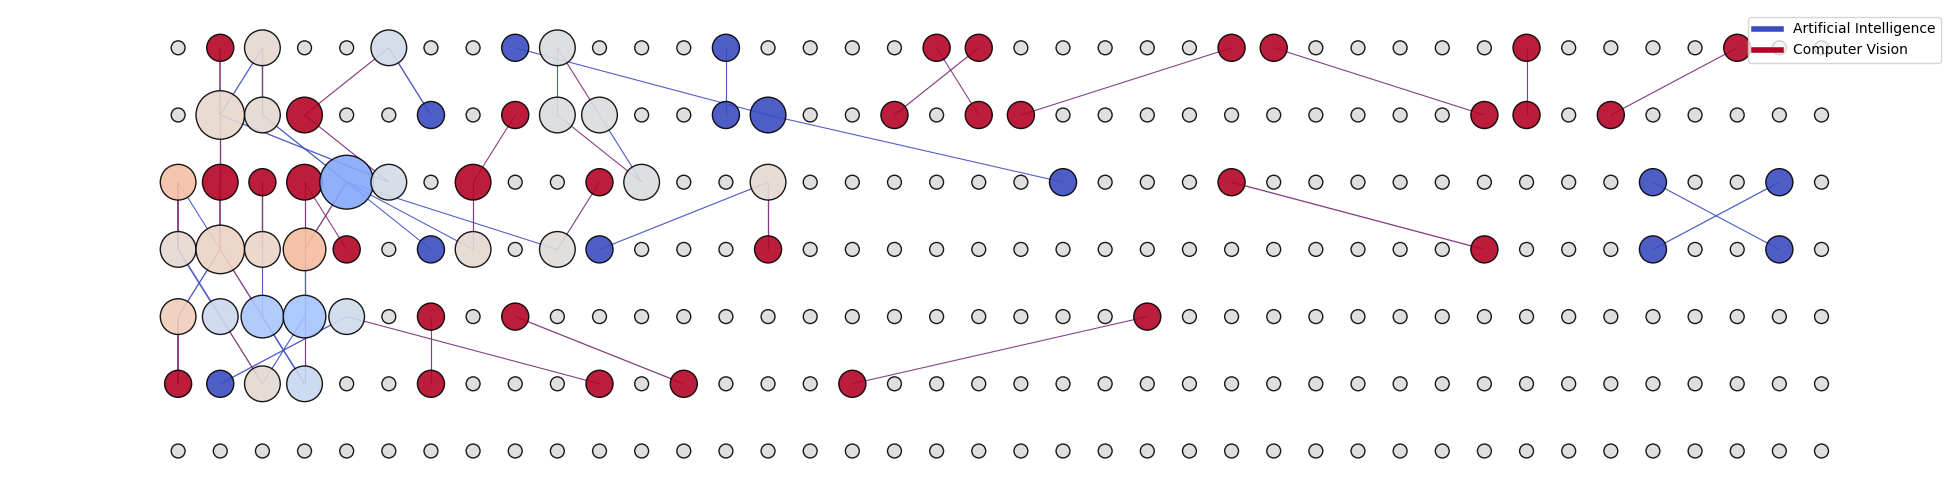

In [15]:
import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Artificial Intelligence', 'Computer Vision'], threshold=0.5)
_ = llm_mri.get_graph_image(g)
plt.show()

[1, 2]


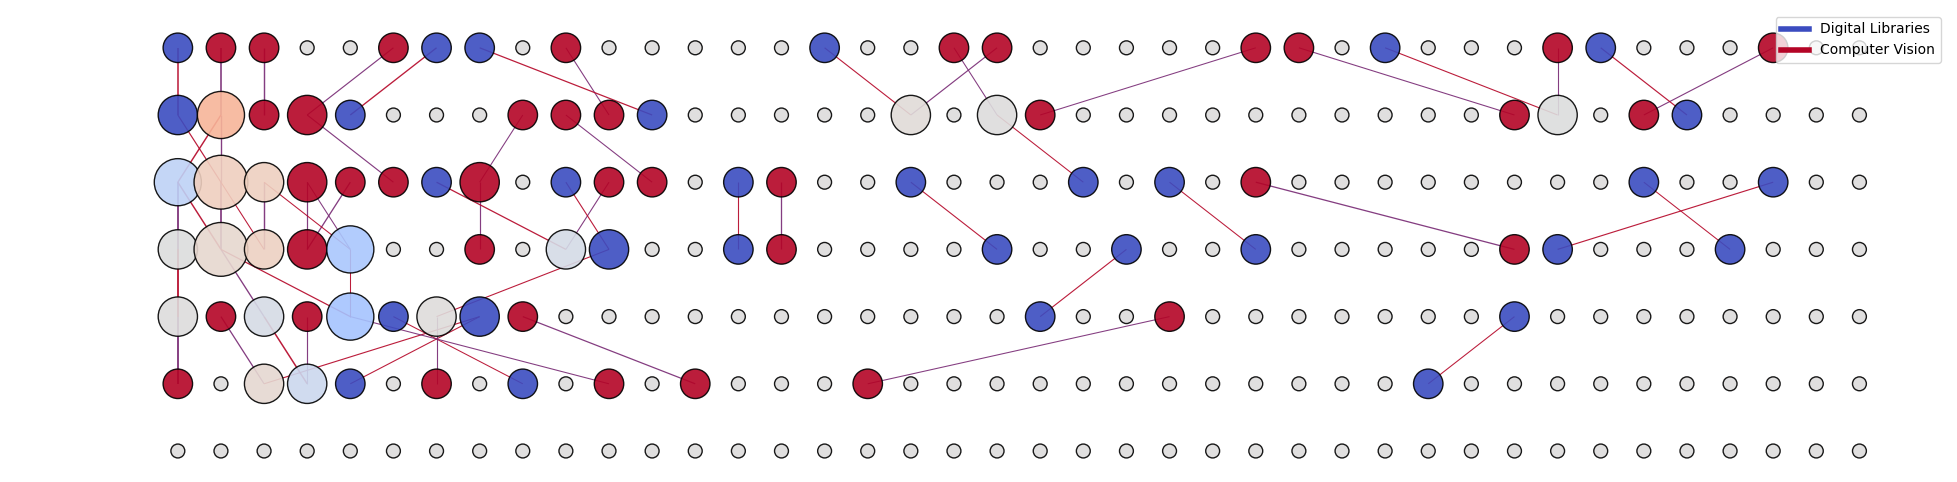

In [16]:
import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Digital Libraries', 'Computer Vision'], threshold=0.5)
_ = llm_mri.get_graph_image(g)
plt.show()

## Obtendo métricas para o bert-base-uncased

In [17]:
model = 'bert-base-uncased'

In [18]:
# Inicializando a biblioteca

from llm_mri import LLM_MRI
llm_mri = LLM_MRI(model=model, device="cpu", dataset=abstracts)

ImportError: cannot import name 'LLM_MRI' from 'llm_mri' (/home/lipecorradini/desktop/unicamp/ic/LLM-MRI/llm_mri/__init__.py)

In [ ]:
# Visualizando quantitativamente métricas para o modelo

# Por algum motivo ainda não está funcionando
path = './data/papers.csv'
num_params = '110 milhões'
map_dimension = 10
# def get_metrics(map_dimension, path, model_ckpt, num_params):

from time import time
import os
import sys

start = time()

print("First Checkpoint")
llm_mri.process_activation_areas(map_dimension)
print("Second Checkpoint")

end = time() - start

# dataframe_activations = llm_mri.reduced_dataset
dataframe_activations = llm_mri.hidden_states_dataset
print("Third Checkpoint")

print("====================== MÉTRICAS DO DATASET DE PAPERS ========================\n")
print(f"Modelo Utilizado: {model}")
print(f"Número de parâmetros do modelo utilizado: {num_params}")
print(f"Tamanho total dos documentos utilizados: {os.path.getsize(path)} bytes")
print(f"Tempo para montagem das áreas de ativação: {end:.2f} segundos")
print(f"Dimensionalidade do mapa utilizado: {map_dimension} x {map_dimension}")
print(f"TODO: Memória usada para montar as áreas de ativação: ")
print(f"Tamanho total do DataFrame das ativações: {sys.getsizeof(dataframe_activations)} bytes") # sys.getsizeof(dataframe_activations)


# get_metrics(10, path, model_ckpt, num_params)

First Checkpoint


Map: 100%|██████████| 150/150 [01:30<00:00,  1.65 examples/s]


Second Checkpoint
Third Checkpoint
====================== MÉTRICAS DO DATASET DE PAPERS ========================

Modelo Utilizado: bert-base-uncased
Número de parâmetros do modelo utilizado: 110 milhões
Tamanho total dos documentos utilizados: 409928 bytes
Tempo para montagem das áreas de ativação: 114.73 segundos
Dimensionalidade do mapa utilizado: 10 x 10
TODO: Memória usada para montar as áreas de ativação: 
Tamanho total do DataFrame das ativações: 48 bytes


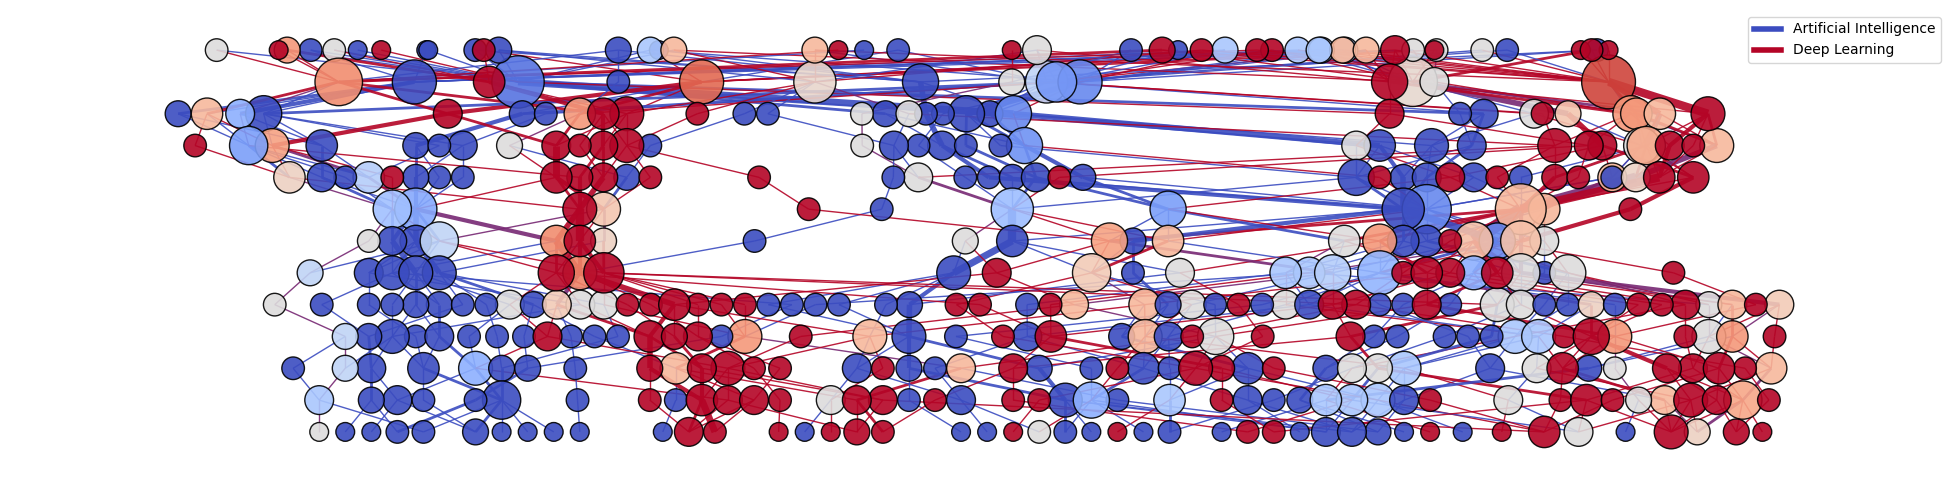

In [ ]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_composed_graph('Artificial Intelligence', 'Digital Libraries')
_ = llm_mri.get_graph_image(g)
plt.show()

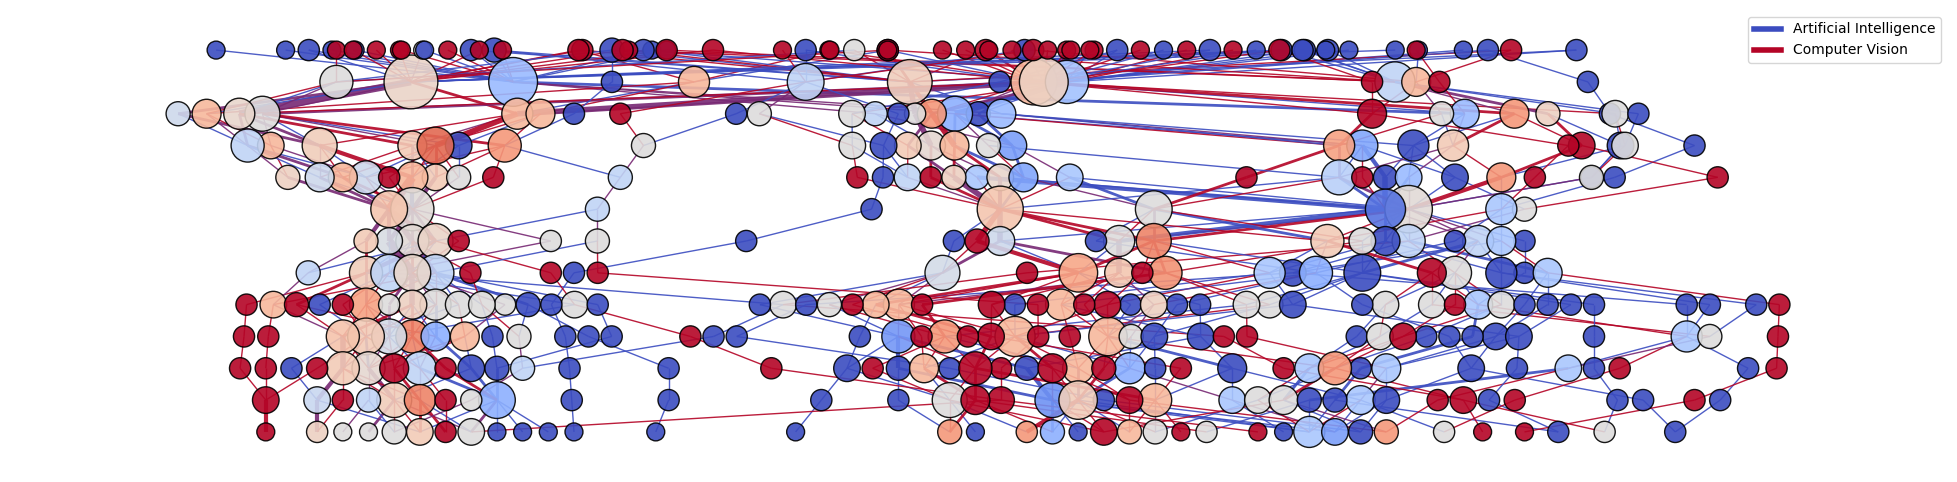

In [ ]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_composed_graph('Artificial Intelligence', 'Computer Vision')
_ = llm_mri.get_graph_image(g)
plt.show()

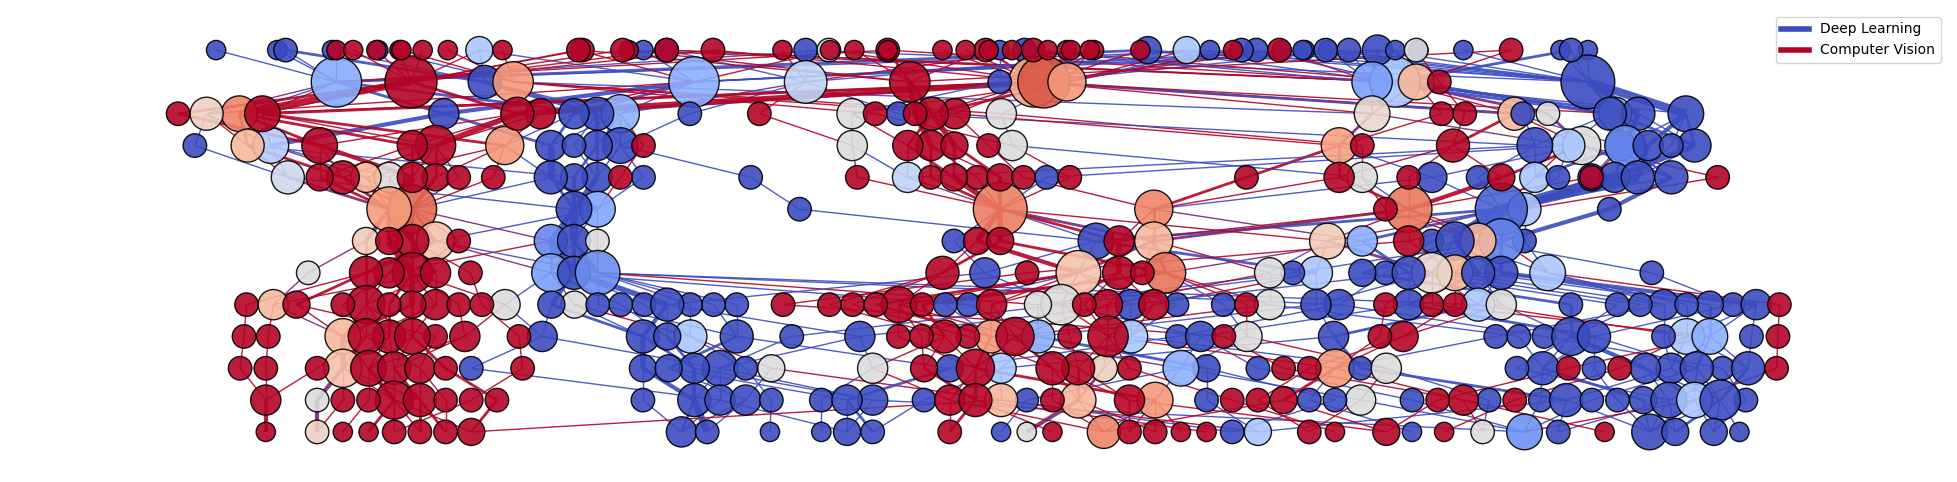

In [ ]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_composed_graph('Digital Libraries', 'Computer Vision')
_ = llm_mri.get_graph_image(g)
plt.show()

<Axes: title={'center': 'UMAP representation for hidden state: 6'}, xlabel='X', ylabel='Y'>

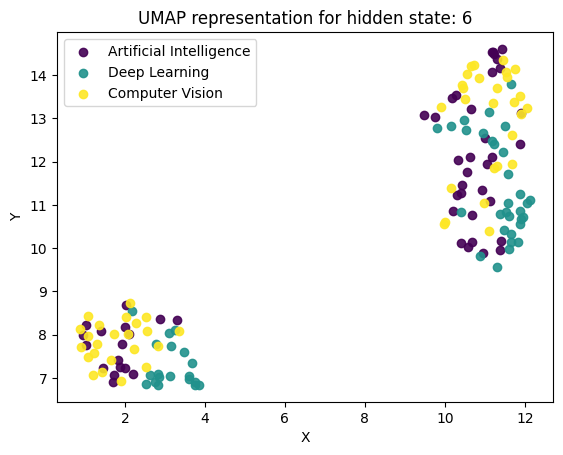

In [ ]:
llm_mri.get_original_map(6)

<Axes: title={'center': 'UMAP representation for hidden state: 7'}, xlabel='X', ylabel='Y'>

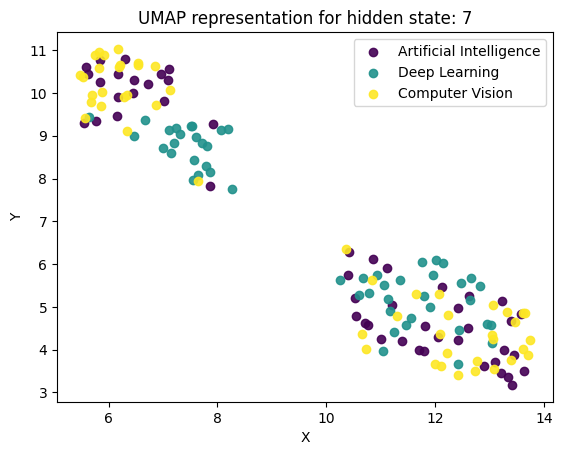

In [ ]:
llm_mri.get_original_map(7)

<Axes: title={'center': 'UMAP representation for hidden state: 8'}, xlabel='X', ylabel='Y'>

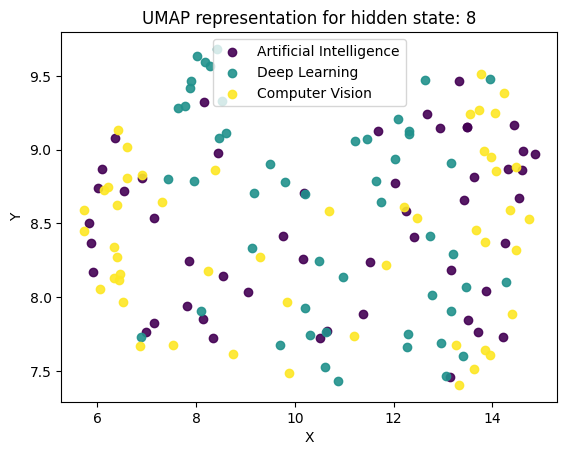

In [ ]:
llm_mri.get_original_map(8)

<Axes: title={'center': 'UMAP representation for hidden state: 9'}, xlabel='X', ylabel='Y'>

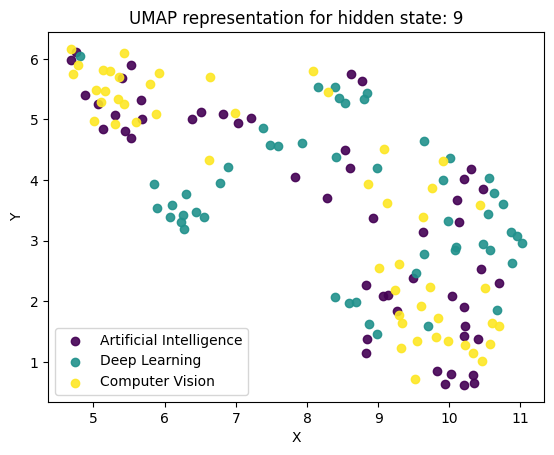

In [ ]:
llm_mri.get_original_map(9)

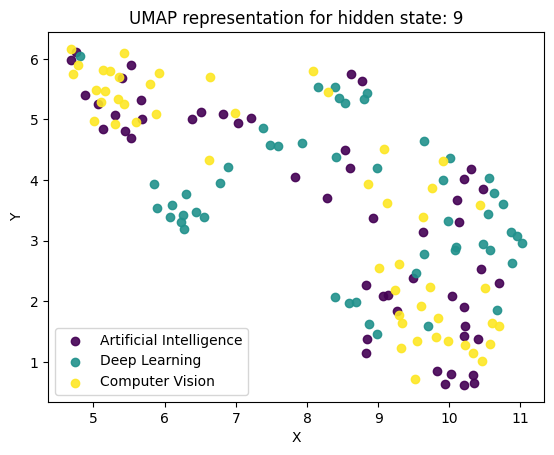

In [ ]:
fig = llm_mri.get_original_map(9)
fig = fig
plt.show()

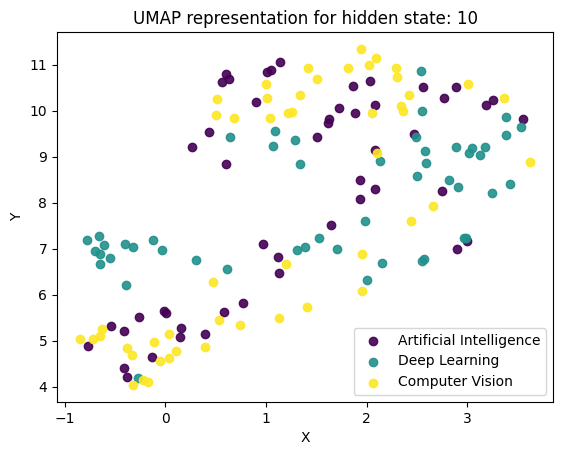

In [ ]:
fig = llm_mri.get_original_map(10)
fig = fig
plt.show()

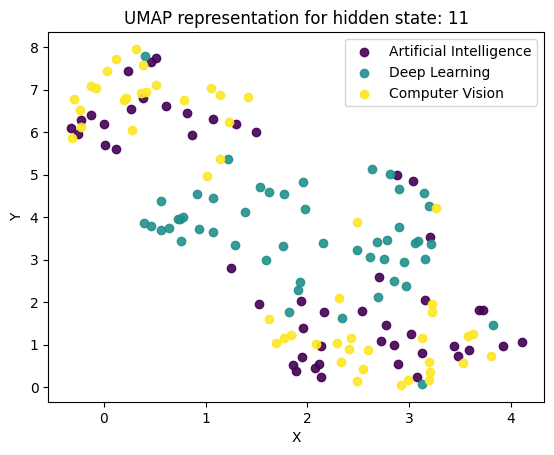

In [ ]:
fig = llm_mri.get_original_map(11)
fig = fig
plt.show()